In [3]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn import mixture
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA as sklearnPCA
from sklearn import preprocessing

df_features=pd.read_csv('df_features.csv')
df_meta=pd.read_csv('df_meta.csv')

In [3]:
filtered_shows = df_meta.loc[df_meta['Show'].isin(['Adele Roberts', 'Scott Mills', 'Clara Amfo',
                                                   'The Radio 1 Breakfast Show with Nick Grimshaw',
                                                   'Dev','The Matt Edmondson Show'])]

In [4]:
le = preprocessing.LabelEncoder()
le.fit(filtered_shows['Show'])
list(le.classes_)
show_labels=le.transform(filtered_shows['Show']) 
le.fit(show_labels)
show_labels

array([3, 3, 3, ..., 1, 1, 1])

In [5]:
X_train, X_test, y_train, y_test =train_test_split(df_features.iloc[filtered_shows.index], 
                                                   filtered_shows.index, test_size=0.2, random_state=42)

In [6]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

sklearn_pca = sklearnPCA(n_components=3)
X_train_std_pca = sklearn_pca.fit_transform(X_train_std)
X_test_std_pca = sklearn_pca.fit_transform(X_test_std)

y_train_labels = filtered_shows["Show"][y_train]

clf = svm.SVC(decision_function_shape='ovo',class_weight='balanced')
clf.fit(X_train_std, y_train_labels) 
predicted_labels = clf.predict(X_test_std)

# n_classes = len(np.unique(y_train))
# clf_gmm = mixture.GaussianMixture(n_components=6, covariance_type='spherical')
# clf_gmm.fit(X_train_std) 

y_test_labels = filtered_shows["Show"][y_test]
class_accuracy =accuracy_score(y_test_labels, predicted_labels)
class_accuracy

0.27292736610418195

In [58]:
y_train_pred = clf_gmm.predict(X_train_std)
train_accuracy = np.mean(y_train_pred.ravel() == y_train.ravel()) * 100
train_accuracy

0.0

In [59]:
y_train_pred

array([2, 2, 0, ..., 3, 1, 0])

In [7]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_labels, predicted_labels)

In [8]:
import matplotlib.pyplot as plt
import itertools
%matplotlib inline
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
#     plt.figure(figsize=(32, 24))

Normalized confusion matrix
[[ 0.13768116  0.20652174  0.13405797  0.02898551  0.19202899  0.30072464]
 [ 0.15357143  0.30714286  0.05        0.          0.18214286  0.30714286]
 [ 0.16836735  0.07653061  0.15816327  0.14795918  0.30102041  0.14795918]
 [ 0.15730337  0.00374532  0.16104869  0.39700375  0.15355805  0.12734082]
 [ 0.16339869  0.11111111  0.18954248  0.05228758  0.23529412  0.24836601]
 [ 0.15183246  0.19371728  0.06806283  0.0104712   0.18324607  0.39267016]]


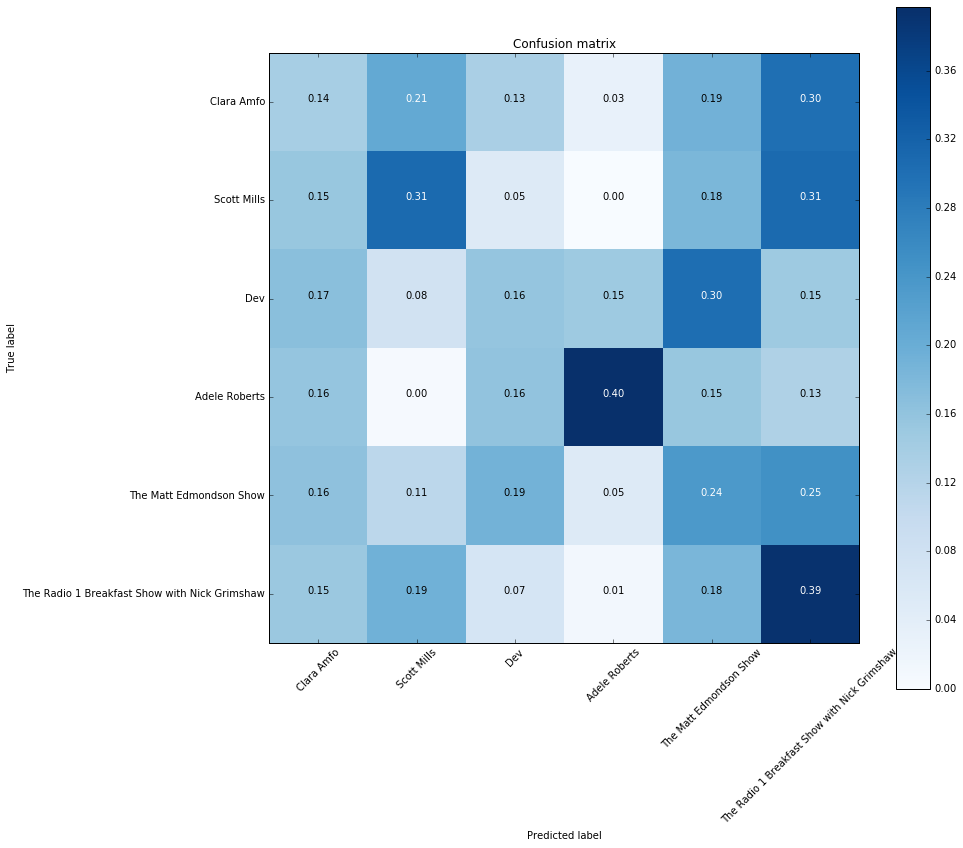

In [10]:
plt.figure(figsize=(14, 12))
plot_confusion_matrix(cm, set(list(predicted_labels)), normalize=True)
plt.show()

In [76]:
filtered_shows.loc[y_test].groupby('Show').count().sort_values("Artist", ascending=False)

,Unnamed: 0,Artist,Date,ID,Name,Number,Song,Station,Track_ID,new_date,new_time
Show,,,,,,,,,,,
Clara Amfo,280,280,280,280,280,280,280,280,280,280,280
Adele Roberts,276,276,276,276,276,276,276,276,276,276,276
Scott Mills,267,267,267,267,267,267,267,267,267,267,267
Dev,196,196,196,196,196,196,196,196,196,196,196
The Radio 1 Breakfast Show with Nick Grimshaw,191,191,191,191,191,191,191,191,191,191,191
The Matt Edmondson Show,153,153,153,153,153,153,153,153,153,153,153


In [77]:
filtered_shows.loc[y_train].groupby('Show').count().sort_values("Artist", ascending=False)

,Unnamed: 0,Artist,Date,ID,Name,Number,Song,Station,Track_ID,new_date,new_time
Show,,,,,,,,,,,
Adele Roberts,1137,1137,1137,1137,1137,1137,1137,1137,1137,1137,1137
Scott Mills,1032,1032,1032,1032,1032,1032,1032,1032,1032,1032,1032
Clara Amfo,1012,1012,1012,1012,1012,1012,1012,1012,1012,1012,1012
The Radio 1 Breakfast Show with Nick Grimshaw,869,869,869,869,869,869,869,869,869,869,869
Dev,759,759,759,759,759,759,759,759,759,759,759
The Matt Edmondson Show,640,640,640,640,640,640,640,640,640,640,640


In [4]:
df_meta

,Unnamed: 0,Artist,Date,ID,Name,Number,Show,Song,Station,Track_ID,new_date,new_time
0,2,NVOY,11/05/2016 00:09,b006wkp7,bbc_1xtra,152055.0,Annie Nightingale,Lord Have Mercy,BBC Radio 1Xtra,0f97f7ddc07c947c4141dd3776751f80.wav,2016-11-05,00:09:00
1,3,NVOY,11/05/2016 00:09,b006wkp7,bbc_1xtra,152055.0,Annie Nightingale,Lord Have Mercy,BBC Radio 1Xtra,0f97f7ddc07c947c4141dd3776751f80.wav,2016-11-05,00:09:00
2,16,Macklemore & Ryan Lewis,18/05/2016 00:03,b006wkp7,bbc_1xtra,147698.0,Annie Nightingale,Dance Off,BBC Radio 1Xtra,3e48738186d9cc4d85cc80595fa85549.wav,2016-05-18,00:03:00
3,17,Macklemore & Ryan Lewis,18/05/2016 00:03,b006wkp7,bbc_1xtra,147698.0,Annie Nightingale,Dance Off,BBC Radio 1Xtra,3e48738186d9cc4d85cc80595fa85549.wav,2016-05-18,00:03:00
4,22,Ducky,18/05/2016 00:23,b006wkp7,bbc_1xtra,159825.0,Annie Nightingale,Work,BBC Radio 1Xtra,1acdf66bdb03830074f8427242bb3bc4.wav,2016-05-18,00:23:00
5,23,Ducky,18/05/2016 00:23,b006wkp7,bbc_1xtra,159825.0,Annie Nightingale,Work,BBC Radio 1Xtra,1acdf66bdb03830074f8427242bb3bc4.wav,2016-05-18,00:23:00
6,24,Gaika,18/05/2016 00:29,b006wkp7,bbc_1xtra,159826.0,Annie Nightingale,GKZ,BBC Radio 1Xtra,3930b1d8f7bf20c7ac46f3b3e93ff0eb.wav,2016-05-18,00:29:00
7,25,Gaika,18/05/2016 00:29,b006wkp7,bbc_1xtra,159826.0,Annie Nightingale,GKZ,BBC Radio 1Xtra,3930b1d8f7bf20c7ac46f3b3e93ff0eb.wav,2016-05-18,00:29:00
8,28,Mija & Vindata,18/05/2016 01:49,b006wkp7,bbc_1xtra,153227.0,Annie Nightingale,Better,BBC Radio 1Xtra,0705f3d3938f694c66f24eb96d178beb.wav,2016-05-18,01:49:00
9,29,Mija & Vindata,18/05/2016 01:49,b006wkp7,bbc_1xtra,153227.0,Annie Nightingale,Better,BBC Radio 1Xtra,0705f3d3938f694c66f24eb96d178beb.wav,2016-05-18,01:49:00
